In [1]:
import requests
import pandas as pd
import time
from tqdm import tqdm

In [2]:
# register for bearer_token from Twitter, I would recommend using Twitter API v2
# Bearer_token = "AAAAAAAAAAAAAAAAAAAAAHw6hAEAAAAA4I79y%2BuBmS7ZC2nQ%2BbWombAotj8%3DpqORwoZBTwPav4t6gf9UPhYnmWvCJlKPj0Tm2gDCSca7mkjB7B"

# Only for actual stuff
Bearer_token = "AAAAAAAAAAAAAAAAAAAAAHe8ZwEAAAAAfyz7l3JAKo4fg77gkKLGIT3z8UI%3D5vcot8a3Y3Sto6YrXKhwVUPSBOZZXfLsWD5dw5ipOWlIS9yKm9"
headers = {"Authorization": "Bearer " + Bearer_token}

In [3]:
NGOS =['U24_gov_ua' # 1513194611396816909
,'razomforukraine'
,'CharityPrytula'
,'WorldVision'
,'IMC_Worldwide'
,'Save the Children'
,'acfusa'
,'MSF'
,'projecthopeorg'
,'RESCUEorg'
,'CAREGlobal'
,'CoramVoice'
,'UNICEFUSA'
,'IMC_Worldwide'
,'Heart_to_Heart' 
,'mercycorps' 
,'WVUCR' 
,'WorldVision'
,'Americares'
,'projectcure'
,'mapintl'
,'medshare'
,'DirectRelief'
,'projecthopeorg'
,'OperationUSA'
,'M25M_org'
,'ReliefIntl'
,'TheJDC'
,'GlobalGiving'
,'ActionAidUSA'
,'SavetheChildren'
,'EpiscopalRelief'
,'CatholicRelief'
,'amnesty'
,'Good360'
]

In [4]:
search_recent = "https://api.twitter.com/2/tweets/search/all"

### From Ukraine

### Get data from people directly affected in Ukraine
Get tweets originating from Ukraine asking for food water and medicine. Not retweets. Maybe no verified to filter out response from NGOs.

In [5]:
# (place_country:UA OR place_country:CZ OR place_country:SK) doesn't give many results
# query = {
#     "query": "(Ukraine needs OR Ukrainians need OR Ukraine needing OR \
#                 Ukrainians needing OR Ukraine requires OR Ukraine requires) \
#                 -is:retweet -is:verified",
#     "tweet.fields": "created_at",
#     'place.fields': 'country',
#     'expansions': 'geo.place_id',
#     "max_results": 100,
#     "start_time": "2022-03-01T15:47:23.000Z",
#     "end_time": "2022-08-30T15:47:23.000Z"
# }
query = {
    "query": "(need OR needs OR urgent OR help) -is:retweet -is:verified (place_country:UA OR place_country:CZ OR place_country:SK)",
    "tweet.fields": "created_at",
    'place.fields': 'country',
    'expansions': 'geo.place_id',
    "max_results": 100,
    "start_time": "2022-03-01T15:47:23.000Z",
    "end_time": "2022-08-30T15:47:23.000Z"
}

In [6]:
response = requests.get(search_recent, headers=headers,  params=query) 
response.json()
dataset = pd.DataFrame(response.json()["data"])
for i in tqdm(range(2000)):
    time.sleep(1)
    try:
        next_token = response.json()['meta']['next_token']
    except:
        break
    query["next_token"] = next_token
    response = requests.get('https://api.twitter.com/2/tweets/search/all',headers=headers,  params=query)
    try:
        res = pd.DataFrame(response.json()["data"])
    except:
        break
    dataset = pd.concat([dataset, res], ignore_index=True)

  0%|          | 3/2000 [00:12<2:14:21,  4.04s/it]


KeyboardInterrupt: 

In [ ]:
dataset_file = 'ukraine_reg_people_tweets_v2.txt'
output = open(dataset_file, "w")
for tweet in dataset['text']:
    output.writelines(tweet)
output.close()

In [ ]:
dataset_file = 'ukraine_reg_people_tweets.txt'
output = open(dataset_file, "w")
for tweet in dataset['text']:
    output.writelines(tweet)
output.close()

In [ ]:
query = {
    "query": "(Ukraine needs OR Ukrainians need OR Ukraine needing OR \
                Ukrainians needing OR Ukraine requires OR Ukraine requires) \
                -is:retweet is:verified",
    "tweet.fields": "created_at",
    'place.fields': 'country',
    'expansions': 'geo.place_id',
    "max_results": 100,
    "start_time": "2022-03-01T15:47:23.000Z",
    "end_time": "2022-08-30T15:47:23.000Z"
}

In [ ]:
response = requests.get(search_recent, headers=headers,  params=query) 
response.json()
dataset = pd.DataFrame(response.json()["data"])
for i in tqdm(range(2000)):
    time.sleep(1)
    try:
        next_token = response.json()['meta']['next_token']
    except:
        break
    query["next_token"] = next_token
    response = requests.get('https://api.twitter.com/2/tweets/search/all',headers=headers,  params=query)
    try:
        res = pd.DataFrame(response.json()["data"])
    except:
        break
    dataset = pd.concat([dataset, res], ignore_index=True)

KeyError: 'data'

In [ ]:
dataset_file = 'ukraine_verified_people_tweets.txt'
output = open(dataset_file, "w")
for tweet in dataset['text']:
    output.writelines(tweet)
output.close()

### Get data from NGOs supporting people affected in Ukraine
Get tweets mentioning food water and medicine. Filter for verified.

In [12]:
from collections import defaultdict
results = defaultdict(list)
for ngo in tqdm(NGOS):
    query = {
        "query": "(Ukraine OR Ukrainians OR gun OR missile OR weapon OR peace OR money OR food OR clothes OR water OR medicine OR supplies) -is:retweet from:"+str(ngo),
        "tweet.fields": "created_at,public_metrics",
        'place.fields': 'country',
        'expansions': 'geo.place_id',
        "max_results": 100,
        "start_time": "2022-01-01T15:47:23.000Z",
        "end_time": "2022-11-27T15:47:23.000Z"
    }
    response = requests.get(search_recent, headers=headers,  params=query) 
    try:
        next_text = [item['text'] for item in response.json()['data']]
    except:
        continue
    results[ngo].extend(next_text)
    next_token = ''
    while next_token != None:
        try:
            next_token = response.json()['meta']['next_token']
        except:
            break
        query["next_token"] = next_token
        response = requests.get(search_recent,headers=headers,  params=query)
        try:
            next_text = [item['text'] for item in response.json()['data']]
        except:
            break
        results[ngo].extend(next_text)

100%|██████████| 35/35 [03:02<00:00,  5.22s/it]


In [13]:
total = 0
for k, val in results.items():
    total += len(val)
total

6952

In [14]:
noise = set(["https", "@", "…", "Putin", "“", "’", "Ukraine, Russia"])
noun = set(("NN", "NNS"))
UKRAINE = set(["ukraine", "Ukraine", "Ukrainian"])
NEED_TERMS = set(['need', 'needs', 'needed', 'needing', 'want', 'wanting', 'wanted', 'requires', 'required', 'require'])

In [46]:
import glob
from tqdm import tqdm
import numpy as np
import nltk
from collections import Counter, defaultdict
from nltk import ngrams
import en_core_web_sm
nlp = en_core_web_sm.load()
from nltk.corpus import stopwords
stopwords = set(stopwords.words())
nltk.download('stopwords')
from tqdm import tqdm
from spacy.matcher import Matcher 

[nltk_data] Downloading package stopwords to /Users/arpan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
military = set(["gun", "missile", "weapon"])
general = set(["peace", "security", "support", "leadership", "donations", "freedom"])
supply = set(["money", "food", "water", "medicine", "doctor", "fuel", "camp", "cloth", "passport"])

In [49]:
from collections import defaultdict
ngo_help = dict()

for ngo, val in results.items():
    unigram_counter = defaultdict(int)
    for i, sentence in enumerate(val):
        pos = nltk.pos_tag(nltk.word_tokenize(sentence))
        for word, tag in pos:
            if tag in noun and word not in noise and len(word) > 3:
                unigram_counter[word] += 1

    need_dict = {"military": 0, "general": 0, "supply": 0}
    for need, freq in unigram_counter.items():
        for w in military:
            if w in need:
                need_dict['military'] += freq
        for w in general:
            if w in need:
                need_dict['general'] += freq
        for w in supply:
            if w in need:
                need_dict['supply'] += freq
    total = sum(need_dict.values())
    for k, v in need_dict.items():
        need_dict[k] = v/total
    ngo_help[ngo] = need_dict

In [50]:
len(ngo_help)

31

In [51]:
ngo_help

{'U24_gov_ua': {'military': 0.06046511627906977,
  'general': 0.6837209302325581,
  'supply': 0.2558139534883721},
 'razomforukraine': {'military': 0.15555555555555556,
  'general': 0.5888888888888889,
  'supply': 0.25555555555555554},
 'CharityPrytula': {'military': 0.14285714285714285,
  'general': 0.5714285714285714,
  'supply': 0.2857142857142857},
 'WorldVision': {'military': 0.013888888888888888,
  'general': 0.2175925925925926,
  'supply': 0.7685185185185185},
 'IMC_Worldwide': {'military': 0.0017452006980802793,
  'general': 0.4973821989528796,
  'supply': 0.5008726003490401},
 'acfusa': {'military': 0.00392156862745098,
  'general': 0.1411764705882353,
  'supply': 0.8549019607843137},
 'MSF': {'military': 0.014388489208633094,
  'general': 0.14388489208633093,
  'supply': 0.841726618705036},
 'projecthopeorg': {'military': 0.006993006993006993,
  'general': 0.6013986013986014,
  'supply': 0.3916083916083916},
 'RESCUEorg': {'military': 0.025,
  'general': 0.48333333333333334,


In [65]:
military = [0.2882650345209625]
general = [0.4567559753016362]
supply = [0.2549789901774013]

for ngo, needs in ngo_help.items():
    military.append(needs['military'])
    general.append(needs['general'])
    supply.append(needs['supply'])

In [66]:
military

[0.2882650345209625,
 0.06046511627906977,
 0.15555555555555556,
 0.14285714285714285,
 0.013888888888888888,
 0.0017452006980802793,
 0.00392156862745098,
 0.014388489208633094,
 0.006993006993006993,
 0.025,
 0.0070921985815602835,
 0.0,
 0.01761252446183953,
 0.0,
 0.005763688760806916,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.025806451612903226,
 0.0,
 0.0,
 0.19607843137254902,
 0.0]

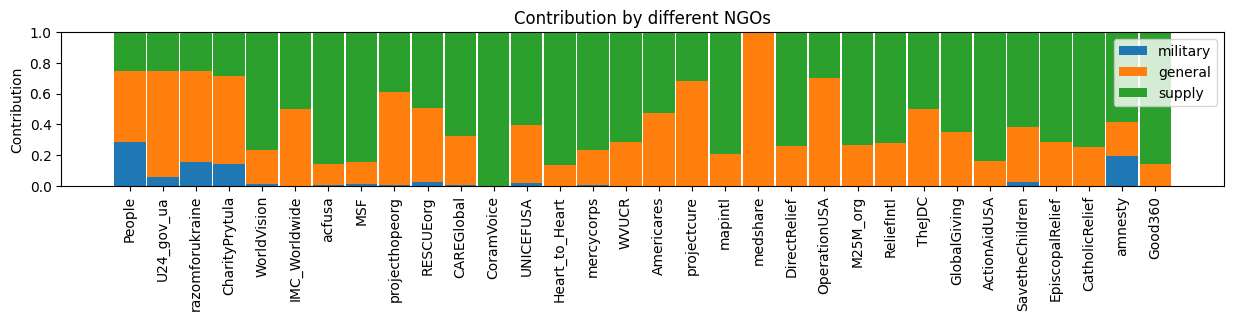

In [78]:

import numpy as np
import matplotlib.pyplot as plt
 
N = 32
 
# military = [0.06046, 0.15555, 0, 0, 0]
# general = (0.6837, 0.58888, 0, 0, 0)
# supply = (0.255, 0.2555, 0, 0, 0)
ind = np.arange(N)  
width = 0.95

gen_mil = [x+y for x, y in zip(military, general)]
 
fig = plt.subplots(figsize =(15, 2))
p1 = plt.bar(ind, military, width)
p2 = plt.bar(ind, general, width,
             bottom = military)
p3 = plt.bar(ind, supply, width,
             bottom = gen_mil)

ticks = ["People"]
ticks.extend(list(ngo_help.keys()))

plt.ylabel('Contribution')
plt.title('Contribution by different NGOs')
plt.xticks(ind, ticks)
plt.legend((p1[0], p2[0], p3[0]), ('military', 'general', 'supply'))
plt.xticks(rotation=90)
plt.show()

In [38]:
print(results.keys())

dict_keys(['U24_gov_ua', 'razomforukraine', 'CharityPrytula', 'WorldVision', 'IMC_Worldwide', 'acfusa', 'MSF', 'projecthopeorg', 'RESCUEorg', 'CAREGlobal', 'CoramVoice', 'Heart_to_Heart', 'mercycorps', 'WVUCR', 'Americares', 'projectcure', 'mapintl', 'medshare', 'DirectRelief', 'OperationUSA', 'ReliefIntl', 'TheJDC', 'GlobalGiving', 'ActionAidUSA', 'SavetheChildren', 'CatholicRelief', 'amnesty', 'Good360'])


In [39]:
for ngo, tweets in results.items():
    print(ngo, len(tweets))

U24_gov_ua 390
razomforukraine 504
CharityPrytula 13
WorldVision 346
IMC_Worldwide 938
acfusa 89
MSF 104
projecthopeorg 394
RESCUEorg 233
CAREGlobal 67
CoramVoice 1
Heart_to_Heart 60
mercycorps 139
WVUCR 25
Americares 105
projectcure 84
mapintl 13
medshare 24
DirectRelief 135
OperationUSA 20
ReliefIntl 7
TheJDC 10
GlobalGiving 75
ActionAidUSA 48
SavetheChildren 109
CatholicRelief 73
amnesty 118
Good360 3


In [42]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /Users/arpan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/arpan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/arpan/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/arpan/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [43]:
sentence = "Over the past six months, Direct Relief has secured and shipped more than 890 tons of requested medicines and supplies to more than 400 healthcare delivery sites in #Ukraine and neighboring countries. https://t.co/qd4I01ZB4q"

In [55]:
for ngo, tweets in results.items():
    print(ngo)
    for sentence in tweets:
        for sent in nltk.sent_tokenize(sentence):
            for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
                nouns = set(("NN", "NNP", "NNS"))
                try:
                    if chunk[1] in nouns:
                        print(chunk)
                except:
                    continue
                if hasattr(chunk, 'label'):
                    print(chunk.label(), ' '.join(c[0] for c in chunk))
            
    break

U24_gov_ua
('ambassador', 'NN')
('@', 'NNP')
('StationCDRKelly', 'NNP')
('times', 'NNS')
('https', 'NN')
('//t.co/bWbKEEVEsy', 'NN')
('months', 'NNS')
('war', 'NN')
('events', 'NNS')
('place', 'NN')
('symbolic', 'NN')
('courage', 'NN')
('steadfastness', 'NN')
('people', 'NNS')
('https', 'NN')
('https', 'NN')
('//t.co/R7s9JjXGFf', 'NN')
('day', 'NN')
('country', 'NN')
('God', 'NNP')
('bless', 'NN')
('day', 'NN')
('guests', 'NNS')
('world', 'NN')
('support', 'NN')
('war', 'NN')
('Today', 'NN')
('memory', 'NN')
('victims', 'NNS')
('years', 'NNS')
('estimates', 'NNS')
('famine', 'NN')
('regime', 'NN')
('Light', 'NNP')
('candle', 'NN')
('window', 'NN')
('https', 'NN')
('//t.co/lqf0kHr22g', 'NN')
('@', 'NNP')
('TimothyDSnyder', 'NNP')
('BY', 'NNP')
('charity', 'NN')
('marathon', 'NN')
('Ukraine🇺🇦', 'NNP')
('kilometers', 'NNS')
('Everyone', 'NN')
('run', 'NN')
('world', 'NN')
('%', 'NN')
('profits', 'NNS')
('fundraiser', 'NN')
('https', 'NN')
('https', 'NN')
('//t.co/hJb1MxIYyb', 'NN')
('devi

('Ambassador', 'NNP')
('History', 'NNP')
('https', 'NN')
('//t.co/ASS6ZVZ3Zl', 'NN')
('fi_irin', 'NN')
('@', 'NNP')
('ZelenskyyUa', 'NNP')
('letters', 'NNS')
('donors', 'NNS')
('donation', 'NN')
PERSON Medical Aid
('part', 'NN')
('Friends', 'NNS')
('initiative', 'NN')
('donations', 'NNS')
('donor', 'NN')
('thank', 'NN')
('letter', 'NN')
('President', 'NNP')
('donation', 'NN')
('option😉', 'NN')
('Thank', 'NNP')
('everyone', 'NN')
('workers', 'NNS')
('StandWithUkraine', 'NNP')
('united24', 'NN')
('mind', 'NN')
('everyone', 'NN')
('link', 'NN')
('subscribe', 'NN')
('donation', 'NN')
('https', 'NN')
('//t.co/W24VexvqHK', 'NN')
('donations', 'NNS')
PERSON Medical Aid
('Yesterday', 'NN')
('thank', 'NN')
('letter', 'NN')
('@', 'NNP')
('ZelenskyyUa', 'NNP')
('donors', 'NNS')
('feedback', 'NN')
('subscriptions', 'NNS')
('donations', 'NNS')
('friends', 'NNS')
('Friends', 'NNS')
('project😄', 'NN')
('https', 'NN')
('//t.co/NZfKRQgV3B', 'NN')
('years', 'NNS')
('goal', 'NN')
('—', 'NN')
('share', 'N

('bakery', 'NN')
('https', 'NN')
('//t.co/TnDxX8qAfV', 'NN')
ORGANIZATION Information Policy
ORGANIZATION National Cathedral School
ORGANIZATION Washington Group
('Cultural', 'NNP')
('Fund', 'NNP')
('US-Ukraine', 'NNP')
ORGANIZATION Business Council
('US-Ukraine', 'NNP')
('Foundation', 'NNP')
('donations', 'NNS')
('UAH', 'NNP')
('donors', 'NNS')
('raffle', 'NN')
('amp', 'NN')
('style', 'NN')
('October', 'NNP')
('@', 'NNP')
('kencen', 'NNP')
ORGANIZATION Benefit Concert
('D.C', 'NNP')
('violinist', 'NN')
('Award-winner', 'NNP')
('@', 'NNP')
('JoshuaBellMusic', 'NNP')
ORGANIZATION New Era Orchestra
('fundraiser', 'NN')
('https', 'NN')
('//t.co/tazxaAmzO0', 'NN')
('inside', 'NN')
('bridge', 'NN')
('tons', 'NNS')
('steel', 'NN')
('bracelets', 'NNS')
('person', 'NN')
('steel', 'NN')
ORGANIZATION UkraineWillWin Illustration
('@', 'NNP')
('grekhov', 'NN')
ORGANIZATION WolfgangGeist No
('treaty', 'NN')
('russia', 'NN')
('anyone', 'NN')
('decisions', 'NNS')
('alliances', 'NNS')
('organizations'

('Mobilization', 'NN')
('russia', 'NN')
('aims', 'NNS')
('statistic', 'NN')
('Kids', 'NNS')
('lives', 'NNS')
('happiness', 'NN')
('war', 'NN')
PERSON Support Ukraine
('https', 'NN')
('UkraineRussiaWar', 'NNP')
('https', 'NN')
('//t.co/6YAXWBaA3e', 'NN')
('donors', 'NNS')
('letters', 'NNS')
('support', 'NN')
('stories', 'NNS')
('photos', 'NNS')
('wishes', 'NNS')
('week', 'NN')
('philanthropists', 'NNS')
('poem', 'NN')
('Trees', 'NNS')
('share', 'NN')
('extract', 'NN')
('https', 'NN')
('//t.co/OR5v33iETP', 'NN')
('Warmates', 'NNS')
('tools', 'NNS')
('operations', 'NNS')
('warmemes', 'NNS')
('means', 'NNS')
('aid', 'NN')
('towards', 'NNS')
('https', 'NN')
('https', 'NN')
('//t.co/wbH0StVOir', 'NN')
ORGANIZATION State Emergency Service
('boy', 'NN')
('holiday', 'NN')
('🤔', 'NN')
('top-notch', 'NN')
('gear', 'NN')
('plenty', 'NN')
('treats', 'NNS')
('stamp', 'NN')
('thing', 'NN')
('assistant', 'NN')
('Armtrac', 'NNP')
('https', 'NN')
('//t.co/KVbUN7f0Bg', 'NN')
('Photos', 'NNS')
('State', '

('people', 'NNS')
('country', 'NN')
('holiday', 'NN')
('—', 'NNP')
('streets', 'NNS')
('city', 'NN')
('squares', 'NNS')
('https', 'NN')
('//t.co/JqITxgObuE', 'NN')
('heroic', 'NN')
('acts', 'NNS')
('military', 'NN')
('courage', 'NN')
('doctors', 'NNS')
('strength', 'NN')
('volunteers', 'NNS')
('resilience', 'NN')
('fight', 'NN')
('support', 'NN')
('Day', 'NNP')
('united24', 'NN')
('August', 'NNP')
('hundreds', 'NNS')
('years', 'NNS')
('fighting', 'NN')
('independence', 'NN')
('Today', 'NN')
('time', 'NN')
('freedom', 'NN')
('stake', 'NN')
('defence', 'NN')
('world', 'NN')
('world', 'NN')
('IndependenceDay', 'NNP')
('https', 'NN')
('//t.co/IsfZkks9Bv', 'NN')
('Thank', 'NNP')
('flash', 'NN')
('mob', 'NN')
('дякуємо_серцем', 'NN')
('workers', 'NNS')
('donation', 'NN')
('https', 'NN')
('//t.co/jL9VcTosjH', 'NN')
('eve', 'NN')
('Day', 'NNP')
('doctors', 'NNS')
('millions', 'NNS')
('Ukrainians', 'NNS')
('year', 'NN')
('months', 'NNS')
('work', 'NN')
('risks', 'NNS')
('—', 'NNP')
('time', 'NN

('“', 'NN')
('situation', 'NN')
('people', 'NNS')
('lives', 'NNS')
('invasion', 'NN')
('foundation', 'NN')
('mission', 'NN')
('https', 'NN')
('//t.co/TLFrtyKyC6', 'NN')
('досі', 'NNP')
('дуже', 'NNP')
('сумно', 'NNP')
('через', 'NNP')
('те', 'NNP')
('що', 'NNP')
('відбувається', 'NNP')
('просто', 'NNP')
('зараз', 'NNP')
('через', 'NNP')
('усвідомлення', 'NNP')
('того', 'NNP')
('скільки', 'NNP')
('людей', 'NNP')
('втратили', 'NNP')
('життя', 'NNP')
('через', 'NNP')
('вторгнення', 'NNP')
('тому', 'NNP')
('я', 'NNP')
('намагаюсь', 'NNP')
('сконцентруватись', 'NNP')
('на', 'NNP')
('своєму', 'NNP')
('фонді', 'NNP')
('на', 'NNP')
('—', 'NNP')
('лише', 'NNP')
('аби', 'NNP')
('мати', 'NNP')
('змогу', 'NNP')
('чимось', 'NNP')
('допомогти', 'NNP')
('»', 'NNP')
('https', 'NN')
('//t.co/TLFrtyKyC6', 'NN')
('charity', 'NN')
('concert', 'NN')
('maestro', 'NN')
PERSON Robert Schaefer
('place', 'NN')
('WNCathedral', 'NNP')
('event', 'NN')
('proceeds', 'NNS')
('honor', 'NN')
('cause', 'NN')
('https', '

('https', 'NN')
('//t.co/h3QEeISDLN', 'NN')
('united24', 'NN')
('ambassador', 'NN')
('@', 'NNP')
('jksheva7', 'NN')
('face', 'NN')
('platform', 'NN')
('role', 'NN')
('football', 'NN')
('field', 'NN')
('contribution', 'NN')
('victory', 'NN')
('https', 'NN')
('https', 'NN')
('//t.co/u3g88OzoLr', 'NN')
('амбасадор', 'NNP')
('@', 'NNP')
('jksheva7', 'NN')
('поспілкувався', 'NNP')
('з', 'NNP')
('@', 'NNP')
('KyivIndependent', 'NNP')
('про', 'NNP')
('те', 'NNP')
('чому', 'NNP')
('погодився', 'NNP')
('стати', 'NNP')
('обличчям', 'NNP')
('платформи', 'NNP')
('поділився', 'NNP')
('враженнями', 'NNP')
('від', 'NNP')
('нового', 'NNP')
('амплуа', 'NNP')
('поза', 'NNP')
('футбольним', 'NNP')
('полем', 'NNP')
('і', 'NNP')
('розповів', 'NNP')
('яким', 'NNP')
('бачить', 'NNP')
('свій', 'NNP')
('власний', 'NNP')
('внесок', 'NNP')
('у', 'NNP')
('перемогу', 'NNP')
('України', 'NN')
('https', 'NN')
('https', 'NN')
('//t.co/USZtiyfRrP', 'NN')
('charity', 'NN')
('telethon', 'NN')
PERSON Save Ukraine
('—', '

('https', 'NN')
('//t.co/Q3uKakXx5F', 'NN')
('розподіляються', 'NNP')
('між', 'NNP')
('@', 'NNP')
('DefenceU', 'NNP')
('@', 'NNP')
('MoH_Ukraine', 'NNP')
('та', 'NNP')
('Міністерством', 'NNP')
('інфраструктури', 'NNP')
('які', 'NNP')
('щотижня', 'NNP')
('звітують', 'NNP')
('про', 'NNP')
('витрати', 'NNP')
('crypto', 'NN')
('funds', 'NNS')
('@', 'NNP')
('DefenceU', 'NNP')
('@', 'NNP')
('MoH_Ukraine', 'NNP')
('@', 'NNP')
('minfrastucture', 'NN')
('expenditures', 'NNS')
('crypto', 'NN')
('donations', 'NNS')
('support', 'NN')
('cryptocurrency', 'NN')
('payment', 'NN')
('company', 'NN')
('@', 'NNP')
('https', 'NN')
('//t.co/Q12imAR0U9', 'NN')
('soldiers', 'NNS')
('line', 'NN')
('freedom', 'NN')
('world', 'NN')
('support', 'NN')
('help', 'NN')
('donation', 'NN')
('Defence', 'NNP')
('Demining', 'NNP')
('https', 'NN')
('//t.co/D4AjheM3ga', 'NN')
('https', 'NN')
('//t.co/7nOS9AveG9', 'NN')
('Collaborations', 'NNS')
('fundraising', 'NN')
('brands', 'NNS')
('movie', 'NN')
('stars', 'NNS')
('music

In [41]:
results['DirectRelief']

['Anne-Claire Howard, Director of the Procurement Group, @UNOPS spoke today @AidExGlobal about sustainable Ukraine relief efforts \n\n“It’s all about applying local market knowledge to achieve sustainability”',
 '“War in Ukraine drew attention to the importance of preparedness, coordination and solidarity to mitigate the devastating effects of armed conflicts on the kidney community in the future” @serhantuglular @AidExGlobal',
 'Dr. Serhan Tuğlular @serhantuglular of the European Renal Association and Direct Relief partner spoke today @AidExGlobal about learnings from Ukraine response efforts - \n\n“Collaboration of national and international societies is essential for better preparedness and intervention”',
 'When Russia invaded Ukraine, @Pelion_SA quickly adapted products and workflow to help during the crisis, including implementing the Health4Ukraine initiative.\n\n https://t.co/IhYnuHINEe',
 'The shipments delivered this week to Ukraine include specifically requested items, such 

In [74]:
query = {
    "query": "(Ukraine) (need (food OR water OR medicine)) -is:retweet -US -Biden -America -Florida",
    "tweet.fields": "created_at",
    'place.fields': 'country',
    'expansions': 'geo.place_id',
    "max_results": 10,
}


#     'expansions': 'author_id',
#     'user.fields': 'id,created_at,verified',
#     'tweet.fields': 'public_metrics',

In [75]:
response = requests.get(search_recent, headers=headers,  params=query) 

In [76]:
response.json()

{'data': [{'created_at': '2022-10-03T17:01:02.000Z',
   'id': '1576980659079630849',
   'text': "A little reminder. It's Putin's war on Ukraine what's responsible for the Energy Crisis and food shortages and no one else. The World need to hold Russia accountable for It's brutal and criminal behavior.",
   'edit_history_tweet_ids': ['1576980659079630849']},
  {'created_at': '2022-10-03T17:01:01.000Z',
   'id': '1576980655174737920',
   'text': '@elonmusk -No need to redo election of annexed region...its was illegal and is part of Ukraine\n-Crimea is Part of Ukraine not Russia\n-Water supply will be just fine under Ukraine leadership \n-Ukraine gets admission to both the EU and UN.\n-FUCK PUTIN',
   'edit_history_tweet_ids': ['1576980655174737920']},
  {'created_at': '2022-10-03T16:57:38.000Z',
   'id': '1576979804175622144',
   'text': '@elonmusk Russia need to leave before any election. \nUkraine is a free nation and should be allowed membership at free will. \nWater supply guaranteed 

In [ ]:
{'created_at': '2022-10-01T16:28:10.000Z',
   'text': '@OmarRiverosays He has done some "decent" things, but he didn\'t really need to give Ukraine $80,000,000,000 he also took away millions of jobs, the inflation reduction act is still using tax payers money, and told our Armies to go on food stamps, I\'d hate for him to be our next president.',
   'edit_history_tweet_ids': ['1576247612294180870'],
   'id': '1576247612294180870'},
 'includes': {'places': [{'country': 'Uganda',
    'full_name': 'Kampala, Uganda',
    'id': '000c69ad123213a8'}]}

In [55]:
results = []
for ngo in NGOS:
    query = {
        "query": "(" + ngo + ") (Ukraine OR Russia) ((supplies needs) OR (financial needs) OR (weapon needs) OR (supply chain needs))",
        "tweet.fields": "created_at entities",
        "expansions": "author_id",
        "max_results": 100,
    }
    response = requests.get(search_recent, headers=headers,  params=query) 
    results.append(response.json())

In [56]:
results[8]

{'errors': [{'parameters': {'tweet.fields': ['created_at entities']},
   'message': 'The `tweet.fields` query parameter value [created_at entities] is not one of [attachments,author_id,context_annotations,conversation_id,created_at,entities,geo,id,in_reply_to_user_id,lang,non_public_metrics,organic_metrics,possibly_sensitive,promoted_metrics,public_metrics,referenced_tweets,reply_settings,source,text,withheld]'}],
 'title': 'Invalid Request',
 'detail': 'One or more parameters to your request was invalid.',
 'type': 'https://api.twitter.com/2/problems/invalid-request'}

In [11]:
response.json()

{'data': [{'created_at': '2022-09-26T15:40:15.000Z',
   'id': '1574423613490479105',
   'author_id': '1514623956472455174',
   'text': 'RT @governa: #UNITED24 was launched by the President of Ukraine V. Zelenskyy as the main venue for collecting donations in support of\xa0🇺🇦. F…'},
  {'created_at': '2022-09-26T15:37:03.000Z',
   'id': '1574422808570068992',
   'author_id': '1572627828218134529',
   'text': "RT @UkrEmbLondon: We're grateful to Ambassador @ViljarLubi, the team of @estembassyuk and their partners for organising an exclusive fundra…"},
  {'created_at': '2022-09-26T15:36:31.000Z',
   'id': '1574422673274257408',
   'author_id': '14766585',
   'text': "RT @UkrEmbLondon: We're grateful to Ambassador @ViljarLubi, the team of @estembassyuk and their partners for organising an exclusive fundra…"},
  {'created_at': '2022-09-26T15:18:40.000Z',
   'id': '1574418181413904385',
   'author_id': '2494318567',
   'text': "We're grateful to Ambassador @ViljarLubi, the team of @estembassy

In [39]:
pd.DataFrame(response.json()["data"])

,created_at,author_id,id,text
0,2022-09-27T17:08:44.000Z,1462578332046925826,1574808267720720386,RT @Kasparov63: As for the response of Ukraine...
1,2022-09-27T16:51:18.000Z,1557806369977286658,1574803881606930434,RT @SlavaUk30722777: 🇺🇦Polina delivers aid to ...
2,2022-09-27T16:34:14.000Z,332346170,1574799588040515584,@Podolyak_M Russia FSB and special operations ...
3,2022-09-27T16:32:14.000Z,144114921,1574799082618593282,RT @SlavaUk30722777: 🇺🇦Polina delivers aid to ...
4,2022-09-27T16:26:13.000Z,1517586460488220672,1574797569590542340,🛡️We have been on huge financial constraints t...
...,...,...,...,...
95,2022-09-26T16:42:21.000Z,1467163518151634947,1574439239839670283,RT @SlavaUk30722777: 🇺🇦Polina delivers aid to ...
96,2022-09-26T16:41:14.000Z,3224303714,1574438960222199818,@Traitor56293542 @OccupyDemocrats Except what'...
97,2022-09-26T16:35:20.000Z,265861907,1574437477561110528,RT @Kasparov63: As for the response of Ukraine...
98,2022-09-26T16:32:24.000Z,299416026,1574436739472822273,RT @Kasparov63: As for the response of Ukraine...
